In [1]:
#all imports here

from nilearn import plotting, image
import nibabel as nib
import os
import numpy as np
from pathlib import Path
import tarfile
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading the data
sub_list = os.listdir("HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d100_ts2")
make_path = lambda x: "HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d100_ts2" + "/" + x

paths = [make_path(i) for i in sub_list]
sub_data = [np.loadtxt(path) for path in paths]

### EDA on Single Subject

In [14]:
#get data for one subject
X = sub_data[1]
X.shape #(data points, brain regions)

(4800, 100)

/var/folders/p1/nnm56jzx5f36hgsqbgpnkr880000gn/T/ipykernel_39773/1701169756.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  cov_matrix = np.corrcoef(X.T, bias=True)


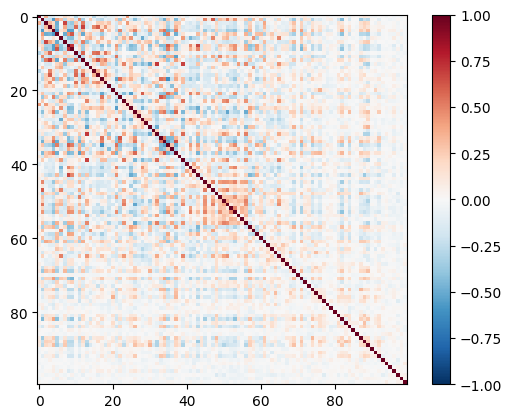

In [16]:
cov_matrix = np.corrcoef(X.T, bias=True)
plt.imshow(cov_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()

atlas has shape ['x', 'y', 'z', 'region'] = (91, 109, 91, 100)


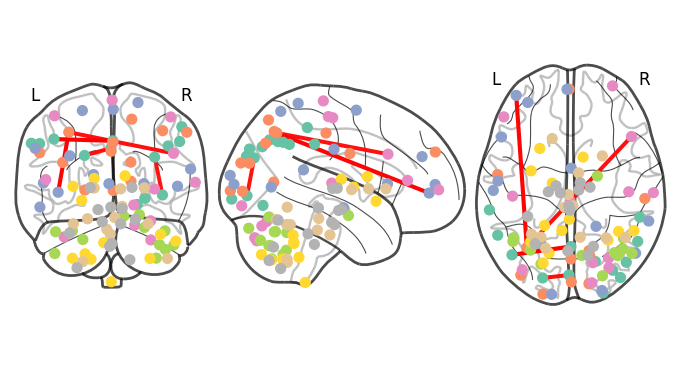

In [19]:
#lets plot it on the brain

atlas = image.load_img("HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d100.ica/melodic_IC_sum.nii.gz")
atlas = image.threshold_img(atlas, "99.5%") 
print("atlas has shape", ["x", "y", "z", "region"], "=", atlas.shape)

atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)

plotting.plot_connectome(cov_matrix, atlas_coords, edge_threshold="99.9%")

In [32]:
#lets check the 99.9 percentile

iu = np.triu_indices(100, 1) #get the upper triangle and and offset it to not include the diagonal
unique_cov = cov_matrix[iu]
threshold = np.percentile(unique_cov, 99.9) #threshold for 99.9 percentile

In [83]:
indices = np.where((cov_matrix >= threshold) & (cov_matrix <0.999))
pairs = np.dstack(indices)
coord = np.unique(next((map(lambda x: np.sort(x), pairs))))
high_cor_coords = list(map(lambda x: x[1], filter(lambda x: x[0] in coord, enumerate(atlas_coords))))

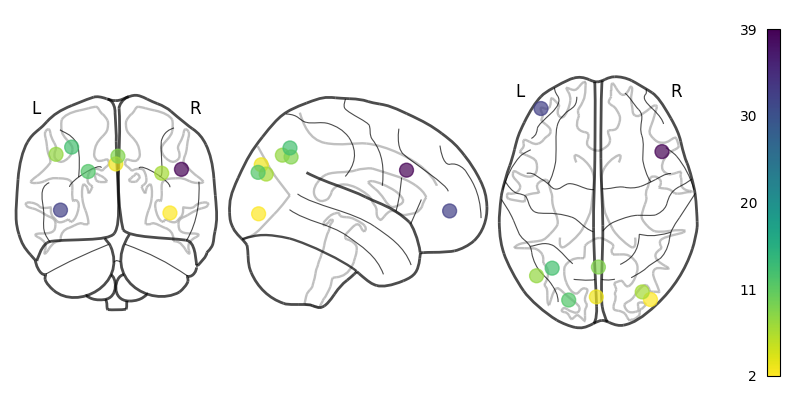

In [84]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
plotting.plot_markers(node_values=coord, node_coords=high_cor_coords, axes=axs)

### EDA on Covariance Matrices

In [28]:
cov_matrix

array([[ 1.        , -0.01997609,  0.35029519, ..., -0.01322838,
        -0.04316054,  0.01956844],
       [-0.01997609,  1.        , -0.20332397, ...,  0.0255411 ,
        -0.02137571, -0.00370402],
       [ 0.35029519, -0.20332397,  1.        , ..., -0.04082139,
         0.00272653,  0.00795254],
       ...,
       [-0.01322838,  0.0255411 , -0.04082139, ...,  1.        ,
         0.03566632,  0.04936984],
       [-0.04316054, -0.02137571,  0.00272653, ...,  0.03566632,
         1.        ,  0.03987547],
       [ 0.01956844, -0.00370402,  0.00795254, ...,  0.04936984,
         0.03987547,  1.        ]])